# **Word Properties Data Assignment**

### October 19, 2025

## Sentiment Analysis of Free Responses to Short Narratives Stories Containing Different Levels of Disfluency

**1.1	Introduction**

Disfluencies are any interruption to the speech stream, such as filled pauses, repetitions, repairs, or silent pauses, and occur frequently in spoken language. Disfluencies are omnipresent in speech, with the natural production rate ranging from 2 to 26 disfluencies per 100 words, but despite this, most prior work on disfluency perception has examined spoken language with low overall rates of disfluency (e.g., 3 per 100 words) or standalone sentences containing one disfluency (Bortfield, 2001; Fox Tree, 1995). Low levels of disfluency have been associated with decreased perception of confidence, competence, and knowledge in the speaker (Brennan and Williams, 1995; Kirkland et al., 2023) while also increasing believability and likeability (Landwehr and Eckman, 2020; Hernandez and Preston, 2013; Trippas et al., 2014), but because they have most commonly been studied in isolation, we don’t know how speaker perceptions change as the speech disfluency density increases. To begin to understand how speaker perception shifts at higher levels, we can look to the stuttering literature, which suggests that it is only at high levels of stuttering that speaker perception is damaged (Panico et al., 2005). However, being given excuses for how a speaker is talking and hearing different densities may raise the threshold (Perez et al., 2025; Ward and Brenner, 2006). Additionally, stuttering-like disfluencies are characterized differently from non-stuttering-like disfluencies, consisting largely of single syllabic repetitions, prolongations, and tense pauses where non-stuttering-like disfluencies are more characterized by repairs, filled pauses, and multi-syllabic or phrase repetitions (Zebrowski et al., 2022).

To better understand how speaker perception changes as non-stutterers use higher levels of disfluency, we collected free responses on what participants thought about different 5 speakers who spoke with 5 different disfluency densities. To analyze the relationship between speaker impressions and number of filled pauses in the passage, I will examine how positive and negative sentiment changes across the different conditions using the NRC Word-Emotion Association Lexicon in conjunction with parts of speech (POS) tagging. The NRC lexicon is a list of words that quantifies their association with eight different emotions and positive and negative sentiment (Mohammad, 2013). Encorporating POS taggings into our use of the NRC lexicon allows for a more accurate quanitfication of sentiment in the text, as most sentiment is contained within adjectives, adverbs, and verbs (Benamara et al, 2007) and on it's own, the NRC lexicon cannot make decisions based on syntax or grammar. This approach also considered negation, which is not considered when we only use the NRC lexicon. This adds a necessary nuance to our categorization as there is a marked difference between "sad" and "not sad". For each free response, I will calculate the proportion of positive and negative words from the adjectives, adverbs, and verbs that have been identified and run a linear mixed effects model to elucidate any relationship between the positive and negative sentiment scores and story condition.

**1.1.1	Research Questions**

How does positive and negative sentiment towards the speaker change as the level of disfluency in the story increases if we isolate adjectives, adverbs, and verbs?

**1.1.2	Hypotheses**

Isolating adjectives, adverbs, and verbs, results will show that sentiment towards the speaker will become more negative and less positive as the level of disfluency in the story increases.

**1.2	Data**

The data for this assignment consists of 500 short free responses about what each participant thought about the speaker and story they listened to. The average number of words in the free responses is 30.38. We collected data from 100 participants who listened to 5 out of 10 possible stories, each narrated by a different speaker using either fluent or 3 percent, 6 percent, 9 percent, or 12 percent disfluent speech. Passage disfluencies were filled pauses (UM or UH) and were predetermined, always happening either at the beginning of a sentence, verb phrase, or noun phrase. Stories and speakers were counterbalanced across participants using a partial Latin Square Design for a total of 50 lists, with two participants on each list. The presentation of each story on a list was randomized. After listening to a story, participants were asked to retell the passage to the best of their ability, rate the speaker on 12 7-point Likert-scales on warmth and competence, and answer a free response question probing their thoughts about the speaker (i.e., Please tell us what you think about this speaker.). The controlled nature of the dataset and our multiple sampling of the same participant across disfluency levels makes this data set an appropriate means to answer our research questions.

Import Required Packages

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os
import spacy
import csv
from scipy.stats import spearmanr
from scipy.stats import ttest_ind

nlp = spacy.load("en_core_web_sm")

Give Colab permission to access data and set working directory

In [3]:
# Load the Drive helper
from google.colab import drive

# Below will prompt for authorization but it will make your google drive available (i.e., mount your drive).
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.getcwd() #what is the current working directory

os.chdir("/content/drive/MyDrive/Colab_Notebooks/NLP/data/data_assignment") #change directory

os.listdir() #dataframes are there

['nrc.csv',
 'narrative_free_response_data.csv',
 'sentiment_free_response_data.csv',
 'sentiment_pos_response_data.csv']

**1.2.1 Data Cleaning**

To clean the data, I started in R studio, where I removed the columns and rows in the dataframe that were related to participant memory for the passage. We code participant memory through breaking the stories into idea units, or the smallest unit of meaning with informational affective value (Stafford et al., 1989). This caused there to be many rows in the 'free response' column that were empty, and so I got rid of those rows here. After that, I saved the new data frame to upload into Google CoLab.

In CoLab, I changed the ID column data type into object from integer so that I could treat it as grouping variables in the later multilevel model analysis. After this, I created a new column for story condition that mapped the conditions fluent, low, normal, medium, and high onto integers 1, 2, 3, 4, and 5. I did this to be able to treat this as a linear variable in the later analysis.

It was fortunate that my dataset was fairly clean, and so the only thing that was needed to finish cleaning the data was to remove 'Enter your text here.' tags that occasionally remained in the text box when a participant entered their answer. I removed these tags using regular expression.

Read in and View Data

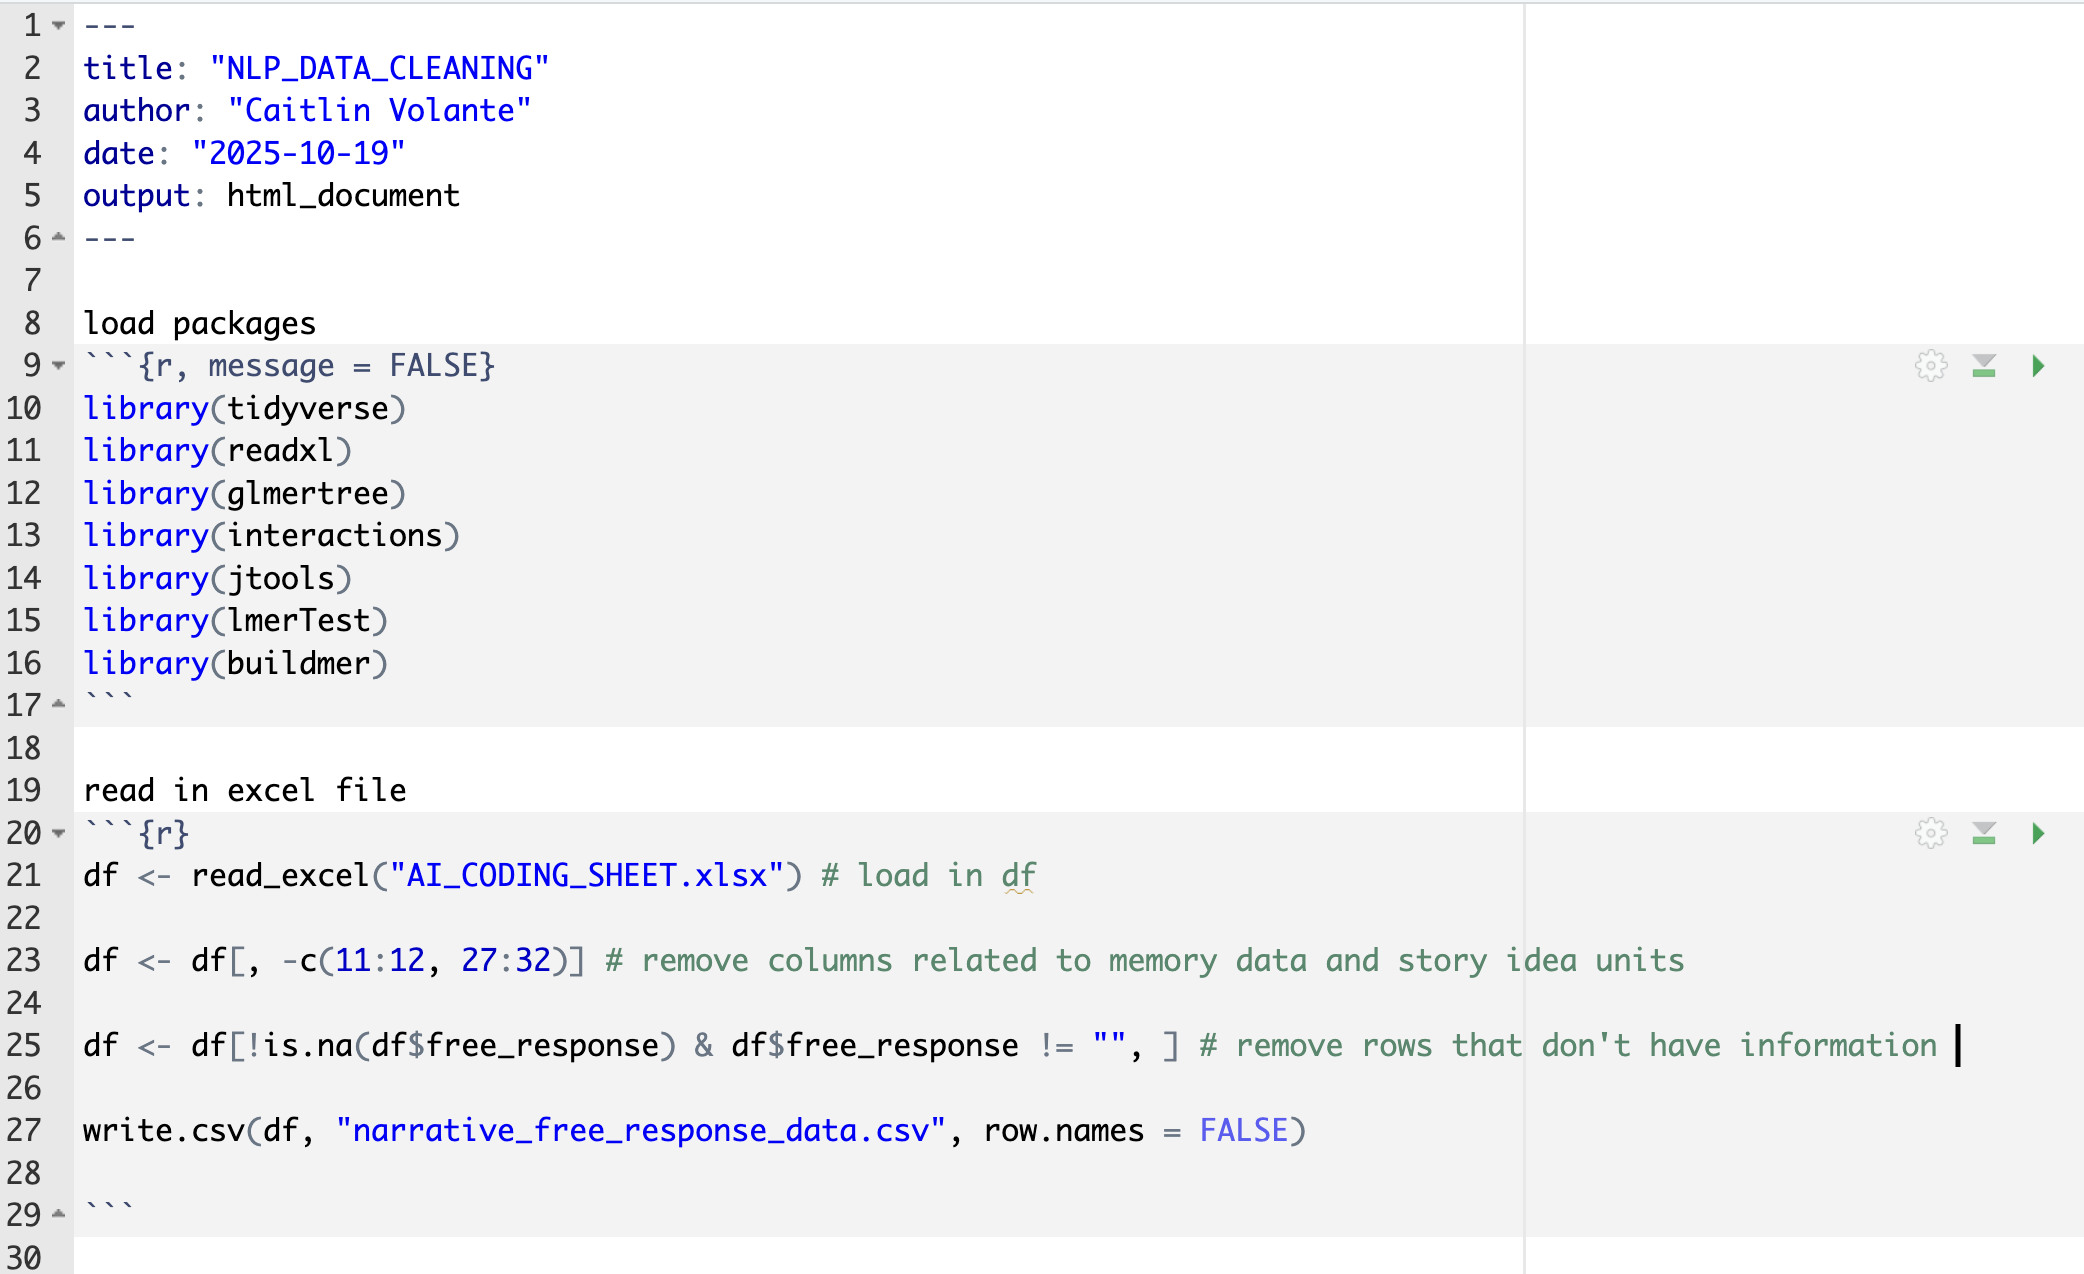

In [5]:
free_response_data = pd.read_csv("narrative_free_response_data.csv")

In [6]:
print(type(free_response_data))

free_response_data

<class 'pandas.core.frame.DataFrame'>


,master,id,prolific_id,unique_id,zip_file,group,order,file_name,story_name,story_condition,...,competence_scale_intelligent,competence_scale_skillful,warmth_scale_friendly,warmth_scale_well_intentioned,warmth_scale_trustworthy,warmth_scale_warm,warmth_scale_good_natured,warmth_scale_sincere,free_response,story_text
0,1,1,6718da927f1110131780367d,7f07-85e4-c284-0fc6,bec15847-8b3c-57eb-2632-47bc4e8a8899.zip,2,1,7f07-85e4-c284-0fc6_dorothy_2.webm,dorothy,low,...,4,4,4,5,3.0,4,4,4,I thought the speaker had a nice voice that co...,"In this story, Dorothy is trying to get to the..."
1,46,1,6718da927f1110131780367d,7f07-85e4-c284-0fc6,bec15847-8b3c-57eb-2632-47bc4e8a8899.zip,2,2,7f07-85e4-c284-0fc6_moppet_4.webm,moppet,medium,...,4,4,4,4,3.0,4,4,4,I thought that the speaker was well-intentione...,"In this story, there is a cat named Miss Moppe..."
2,91,1,6718da927f1110131780367d,7f07-85e4-c284-0fc6,bec15847-8b3c-57eb-2632-47bc4e8a8899.zip,2,3,7f07-85e4-c284-0fc6_bookfair_1.webm,bookfair,fluent,...,4,3,4,5,4.0,4,4,5,I thought the speaker sounded honest sincere h...,"So, I have two older sisters, Cassie and Eliza..."
3,141,1,6718da927f1110131780367d,7f07-85e4-c284-0fc6,bec15847-8b3c-57eb-2632-47bc4e8a8899.zip,2,4,7f07-85e4-c284-0fc6_food_5.webm,food,high,...,4,3,4,4,3.0,3,3,4,I thought the speaker was well-spoken and gave...,"­­­Growing up, one of the ways that our church..."
4,191,1,6718da927f1110131780367d,7f07-85e4-c284-0fc6,bec15847-8b3c-57eb-2632-47bc4e8a8899.zip,2,5,7f07-85e4-c284-0fc6_blue_3.webm,blue,normal,...,5,5,5,5,5.0,5,5,5,The speaker sounded sincere trustworthy and co...,My father's big on cars. My parents are both f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,24261,105,5f5452df72345118f58d187b,9b81-ba0c-6915-c095,03d85b71-3f97-3f1a-e3fc-c08a8f8818b2.zip,23,2,m1_blue_low.wav,blue,low,...,5,5,5,5,5.0,5,5,5,Enter your text here.I think he was a kid that...,My father's big on cars. My parents are both f...
496,24311,105,5f5452df72345118f58d187b,9b81-ba0c-6915-c095,03d85b71-3f97-3f1a-e3fc-c08a8f8818b2.zip,23,5,f2_peter_rabbit_high.wav,peterrabbit,high,...,4,4,3,4,4.0,4,5,4,Enter your text here.I think she was a good we...,"In this story, Peter Rabbit and his sisters ar..."
497,24361,105,5f5452df72345118f58d187b,9b81-ba0c-6915-c095,03d85b71-3f97-3f1a-e3fc-c08a8f8818b2.zip,23,3,m2_moppet_normal.wav,moppet,normal,...,2,2,2,3,3.0,3,3,3,Enter your text here.I think he was lacking co...,"In this story, there is a cat named Miss Moppe..."
498,24406,105,5f5452df72345118f58d187b,9b81-ba0c-6915-c095,03d85b71-3f97-3f1a-e3fc-c08a8f8818b2.zip,23,1,f3_dorothy_fluent.wav,dorothy,fluent,...,5,5,5,5,5.0,5,5,5,Enter your text here.A soft spoken competent p...,"In this story, Dorothy is trying to get to the..."


In [7]:
free_response_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   master                         500 non-null    int64  
 1   id                             500 non-null    int64  
 2   prolific_id                    500 non-null    object 
 3   unique_id                      500 non-null    object 
 4   zip_file                       500 non-null    object 
 5   group                          500 non-null    int64  
 6   order                          500 non-null    int64  
 7   file_name                      500 non-null    object 
 8   story_name                     500 non-null    object 
 9   story_condition                500 non-null    object 
 10  competence_scale_competent     500 non-null    int64  
 11  competence_scale_confidence    500 non-null    int64  
 12  competence_scale_capable       500 non-null    int

Make id an object instead of an integer for later analysis

In [8]:
free_response_data['id'] = free_response_data['id'].astype('object')

display(free_response_data[['id']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      500 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB


None

Create a new column for story_condition that is numeric for later analysis

In [9]:
condition_mapping = {
    'fluent': 1,
    'low': 2,
    'normal': 3,
    'medium': 4,
    'high': 5}

free_response_data['story_condition_numeric'] = free_response_data['story_condition'].map(condition_mapping)
display(free_response_data.head(3))

,master,id,prolific_id,unique_id,zip_file,group,order,file_name,story_name,story_condition,...,competence_scale_skillful,warmth_scale_friendly,warmth_scale_well_intentioned,warmth_scale_trustworthy,warmth_scale_warm,warmth_scale_good_natured,warmth_scale_sincere,free_response,story_text,story_condition_numeric
0,1,1,6718da927f1110131780367d,7f07-85e4-c284-0fc6,bec15847-8b3c-57eb-2632-47bc4e8a8899.zip,2,1,7f07-85e4-c284-0fc6_dorothy_2.webm,dorothy,low,...,4,4,5,3.0,4,4,4,I thought the speaker had a nice voice that co...,"In this story, Dorothy is trying to get to the...",2
1,46,1,6718da927f1110131780367d,7f07-85e4-c284-0fc6,bec15847-8b3c-57eb-2632-47bc4e8a8899.zip,2,2,7f07-85e4-c284-0fc6_moppet_4.webm,moppet,medium,...,4,4,4,3.0,4,4,4,I thought that the speaker was well-intentione...,"In this story, there is a cat named Miss Moppe...",4
2,91,1,6718da927f1110131780367d,7f07-85e4-c284-0fc6,bec15847-8b3c-57eb-2632-47bc4e8a8899.zip,2,3,7f07-85e4-c284-0fc6_bookfair_1.webm,bookfair,fluent,...,3,4,5,4.0,4,4,5,I thought the speaker sounded honest sincere h...,"So, I have two older sisters, Cassie and Eliza...",1


In [10]:
free_response_data["free_response"]

,free_response
0,I thought the speaker had a nice voice that co...
1,I thought that the speaker was well-intentione...
2,I thought the speaker sounded honest sincere h...
3,I thought the speaker was well-spoken and gave...
4,The speaker sounded sincere trustworthy and co...
...,...
495,Enter your text here.I think he was a kid that...
496,Enter your text here.I think she was a good we...
497,Enter your text here.I think he was lacking co...
498,Enter your text here.A soft spoken competent p...


Clean the text

In [11]:
# Remove 'Enter your text here.'
# This is left-over in the text box if participants don't delete it before typing their answers.

enter_text_pattern = r'(Enter your text here\.)'

free_response_data['free_response'] = free_response_data['free_response'].str.replace(enter_text_pattern, '', regex=True)

display(free_response_data['free_response'])

,free_response
0,I thought the speaker had a nice voice that co...
1,I thought that the speaker was well-intentione...
2,I thought the speaker sounded honest sincere h...
3,I thought the speaker was well-spoken and gave...
4,The speaker sounded sincere trustworthy and co...
...,...
495,I think he was a kid that was just trying his ...
496,I think she was a good well intended person th...
497,I think he was lacking confidence but tried to...
498,A soft spoken competent person.


**1.3 POS Tagging and Sentiment Analysis**

After cleaning the data, I read in and cleaned the NRC to prepare for sentiment analysis. I decided to use the Bag of Words approach and NRC dataset instead of the dictionary approach and anew data since my texts are so small and we probably wouldn't be able to detect anything outside of a binary positive/negative outcome. To clean the NRC data, I created a dictionary that took the first word of the column title and the words words in the column as the key and definitition and removed all NA values.

Spacy Pipeline

In [12]:
#spaCy texts

free_response_docs = list(nlp.pipe(free_response_data.free_response))

Use the Bag of Words Approach
- Read in and clean the nrc.csv data

In [13]:
# Read in NRC data

nrc_df = pd.read_csv('nrc.csv')

nrc_df

,Anger_NRC,Anticipation_NRC,Disgust_NRC,Fear_NRC,Joy_NRC,Negative_NRC,Positive_NRC,Sadness_NRC,Surprise_NRC,Trust_NRC
0,expletive,unfulfilled,smut,smut,tantalizing,smut,greeting,measles,greeting,proven
1,inept,tantalizing,measles,measles,felicity,expletive,tantalizing,inconsequential,unfulfilled,privy
2,unfulfilled,wait,inept,lynch,lovable,measles,inventor,unfulfilled,tantalizing,pawn
3,lynch,haste,perverted,militia,unbeaten,inept,felicity,lynch,trump,lovable
4,agitation,unbeaten,lynch,servile,superstar,perverted,civility,gray,unbeaten,merchant
...,...,...,...,...,...,...,...,...,...,...
3319,NaN,NaN,NaN,NaN,NaN,revive,NaN,NaN,NaN,NaN
3320,NaN,NaN,NaN,NaN,NaN,lace,NaN,NaN,NaN,NaN
3321,NaN,NaN,NaN,NaN,NaN,schism,NaN,NaN,NaN,NaN
3322,NaN,NaN,NaN,NaN,NaN,annoy,NaN,NaN,NaN,NaN


In [14]:
# Data put into dictionaries (which is easier to access)

nrc_dict = {} #empty ditionary
for col_name, col_data in nrc_df.items(): #uses .items to iterate over columns
  # Keep the part before the underscore and lowercase it
  new_col_name = col_name.split('_')[0].lower() #splits column name on '_' and accesses first element and lowers it

  # Let's also remove nan values
  new_col_data = col_data.dropna()

  # put into dictionary
  nrc_dict[new_col_name] = new_col_data.tolist() #uses tolist to add columns and values to dictionary

print(nrc_dict["positive"][0:11]) #first 12 values for positive
print(nrc_dict["positive"][-11:]) #last 12

['greeting', 'tantalizing', 'inventor', 'felicity', 'civility', 'artistic', 'lovable', 'restful', 'unbeaten', 'superstar', 'tutelage']
['adaptable', 'community', 'success', 'salutary', 'quaint', 'revive', 'lace', 'truce', 'candidate', 'endowment', 'structure']


In [15]:
# print first five keys and values

i = 0
for key, val in nrc_dict.items():
    print(f"Key: {key}, \nValues: {val}")
    i += 1
    if i == 5:
        break

Key: anger, 
Values: ['expletive', 'inept', 'unfulfilled', 'lynch', 'agitation', 'wrongdoing', 'satanic', 'militia', 'bellows', 'warden', 'complicate', 'opera', 'death', 'shoplifting', 'excitation', 'frenetic', 'unlawful', 'stifled', 'miserable', 'penalty', 'obliterated', 'reproach', 'grated', 'offender', 'devastation', 'wring', 'dissension', 'condemn', 'explode', 'thoughtless', 'sting', 'fleece', 'vengeful', 'segregate', 'subsidy', 'abomination', 'revolting', 'exaggerate', 'hellish', 'disrespect', 'delay', 'delinquent', 'crusade', 'disgusting', 'disobedient', 'duel', 'annihilate', 'antisocial', 'oppression', 'banger', 'grumpy', 'obliterate', 'inequality', 'dumps', 'tree', 'dismay', 'mortality', 'defy', 'disease', 'harassing', 'accused', 'bad', 'skirmish', 'gall', 'combatant', 'hot', 'horrible', 'frightful', 'unfair', 'tolerate', 'coercion', 'backbone', 'adversary', 'misconception', 'thump', 'criminal', 'devastating', 'berserk', 'blatant', 'corrupting', 'reversal', 'bastion', 'blast', 

To calculate the positive and negative sentiment values in the data, I created a list of negations. I then tokenized the free responses and looped through each doc to identify which tokens were an adjective, adverb, or verb. If they met this criteria, they were lemmatized. After determining whether they were positive and negative per the NRC dictionary, I checked if any of the two words that preceded it were a part of the negations list that was created. After counting all the positive and negative words, I divided by the number of words in the free response, making sure to use our safe divide function so that any zeros wouldn't return an error. After that, I appended the positive and negative scores to the dataframe in new columns called NRC_positive and MRC_negative.

After calculating the positive and negative sentiment scores, I exported the dataframe to do the final analysis of the data in R.

In [16]:
# safe divide function to stop zero counts for words from causing problems
# some texts may have zero words after pre-processing

def safe_divide(a, b):
    if b != 0:
        return a/b
    else:
        return 0

In [17]:
#introduce a list of negations
negations = ["not", "never", "neither", "barely", "hardly", "scarcely", "seldom", "rarely", "no", "nothing", "none", "nobody", "nowhere"]

num_words_final = []
all_positives = []
all_negatives = []

for doc in free_response_docs: #go through each document

  # initialize counters for the current doc
  num_words = 0 # if you give your variables descriptive names, you don't need a comment to explain the name ;-)
  positive_count = 0
  negative_count = 0

  for i, token in enumerate(doc): #yields pairs of the form (index, token) for each token in doc

    # Continue to the next token if this token is punctuation or whitespace
    if token.is_punct or token.is_space:
      continue #skip these

    # Since we skipped punctuation/whitespace, we know the current token is a word
    num_words += 1

    # Let's get the form of the token that best matches our NRC word list
    if token.pos_ == "VERB":
      parsed_token = token.lemma_
    elif token.pos_ in ["ADV", "ADJ"]:
      parsed_token = token.lemma_
    else: # the current token is some other part of speech
      continue

    if parsed_token in nrc_dict["negative"]:
      doc_slice = doc[ max(0, i-2) : i ]
      if any(preceding_token.lower_ in negations for preceding_token in doc_slice):
        continue
      negative_count += 1

    elif parsed_token in nrc_dict["positive"]:
      doc_slice = doc[ max(0, i-2) : i ]
      if any(preceding_token.lower_ in negations for preceding_token in doc_slice):
        continue
      positive_count += 1

  #norm by number of words and assign to list of lists
  all_positives.append(safe_divide(positive_count, num_words))
  all_negatives.append(safe_divide(negative_count, num_words))
  num_words_final.append(num_words)

print(all_positives)
print(all_negatives)
print(num_words_final)

[0.04878048780487805, 0.06060606060606061, 0.13043478260869565, 0.04, 0.09523809523809523, 0.15384615384615385, 0.0, 0.05555555555555555, 0.0, 0.05, 0.0, 0.0, 0.047619047619047616, 0.0, 0.0, 0.07142857142857142, 0.0, 0.01694915254237288, 0.05084745762711865, 0.0, 0.047619047619047616, 0.07142857142857142, 0.05555555555555555, 0.030303030303030304, 0.15789473684210525, 0.04411764705882353, 0.030303030303030304, 0.0196078431372549, 0.0, 0.05405405405405406, 0.02702702702702703, 0.02127659574468085, 0.046511627906976744, 0.07692307692307693, 0.13636363636363635, 0.0, 0.07142857142857142, 0.08333333333333333, 0.0, 0.08333333333333333, 0.0, 0.09375, 0.1111111111111111, 0.04, 0.11764705882352941, 0.03225806451612903, 0.034482758620689655, 0.13333333333333333, 0.05555555555555555, 0.02857142857142857, 0.047619047619047616, 0.06060606060606061, 0.029411764705882353, 0.09090909090909091, 0.038461538461538464, 0.044444444444444446, 0.0, 0.0, 0.05, 0.0, 0.05, 0.058823529411764705, 0.0, 0.03030303

In [18]:
free_response_data['NW'] = num_words_final #create a new column in pandas called NW and assign it the values from final_nw
free_response_data['NRC_positive'] = all_positives
free_response_data['NRC_negative'] = all_negatives

free_response_data.head(3)

,master,id,prolific_id,unique_id,zip_file,group,order,file_name,story_name,story_condition,...,warmth_scale_trustworthy,warmth_scale_warm,warmth_scale_good_natured,warmth_scale_sincere,free_response,story_text,story_condition_numeric,NW,NRC_positive,NRC_negative
0,1,1,6718da927f1110131780367d,7f07-85e4-c284-0fc6,bec15847-8b3c-57eb-2632-47bc4e8a8899.zip,2,1,7f07-85e4-c284-0fc6_dorothy_2.webm,dorothy,low,...,3.0,4,4,4,I thought the speaker had a nice voice that co...,"In this story, Dorothy is trying to get to the...",2,41,0.048780,0.000000
1,46,1,6718da927f1110131780367d,7f07-85e4-c284-0fc6,bec15847-8b3c-57eb-2632-47bc4e8a8899.zip,2,2,7f07-85e4-c284-0fc6_moppet_4.webm,moppet,medium,...,3.0,4,4,4,I thought that the speaker was well-intentione...,"In this story, there is a cat named Miss Moppe...",4,33,0.060606,0.000000
2,91,1,6718da927f1110131780367d,7f07-85e4-c284-0fc6,bec15847-8b3c-57eb-2632-47bc4e8a8899.zip,2,3,7f07-85e4-c284-0fc6_bookfair_1.webm,bookfair,fluent,...,4.0,4,4,5,I thought the speaker sounded honest sincere h...,"So, I have two older sisters, Cassie and Eliza...",1,23,0.130435,0.043478


In [19]:
# Save the dataframe to a CSV file
# index=False prevents writing the dataframe index as a column
free_response_data.to_csv('sentiment_pos_response_data.csv', index=False)

In [20]:
average_nw = free_response_data['NW'].mean()
print(f"The average number of words in the free responses is: {average_nw}")

The average number of words in the free responses is: 30.376


**1.3.1 Mixed-Effects Models completed in R**

To determine any causal relationship between the level of disfuencies in a passage and positive and negative sentiment towards the speaker, I conducted two linear mixed effects models with story condition treated at a linear variable.

Results from a linear mixed effects model predicting positvie sentiment scores as a function of story condition with ID as a random effect found that story condition was a significant predictor for positive sentiment score (beta = -0.0029, SE = -0.0034, t = -2.072, p = 0.039). This suggests that level of dislfuency in the passage had an effect on participant's positive impressions towards the speaker, such that as the level of disfluency in the story increase, positive sentiment decreases.

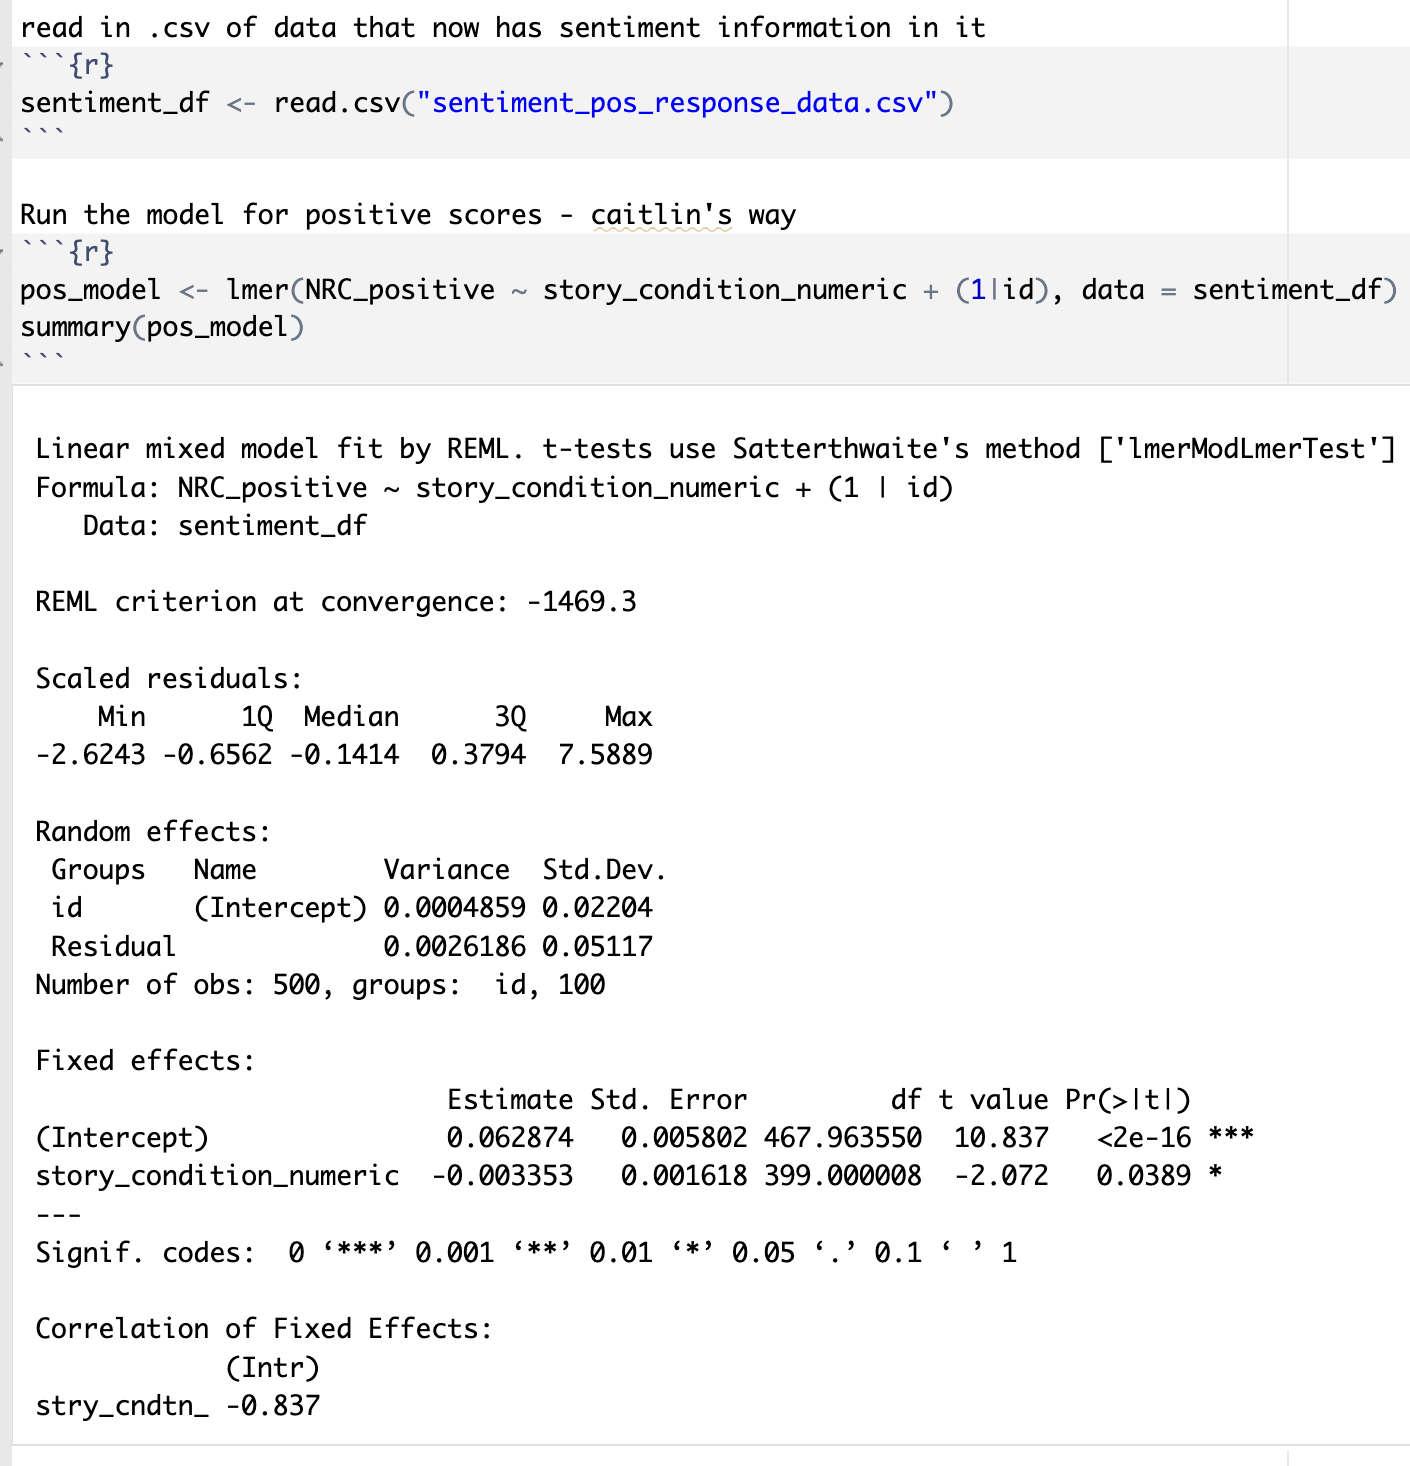

Results from a linear mixed effects model predicting negative sentiment scores as a function of story condition with ID as a random effect found that story condition was a significant predictor for negative sentiment score (beta = -0.0029, SE = 0.0016, t = 2.25, p = 0.025). This suggests that level of dislfuency in the passage had an effect on participant's negative impressions towards the speaker, such that as the level of disfluency in the story increases, so does the negative sentiment.

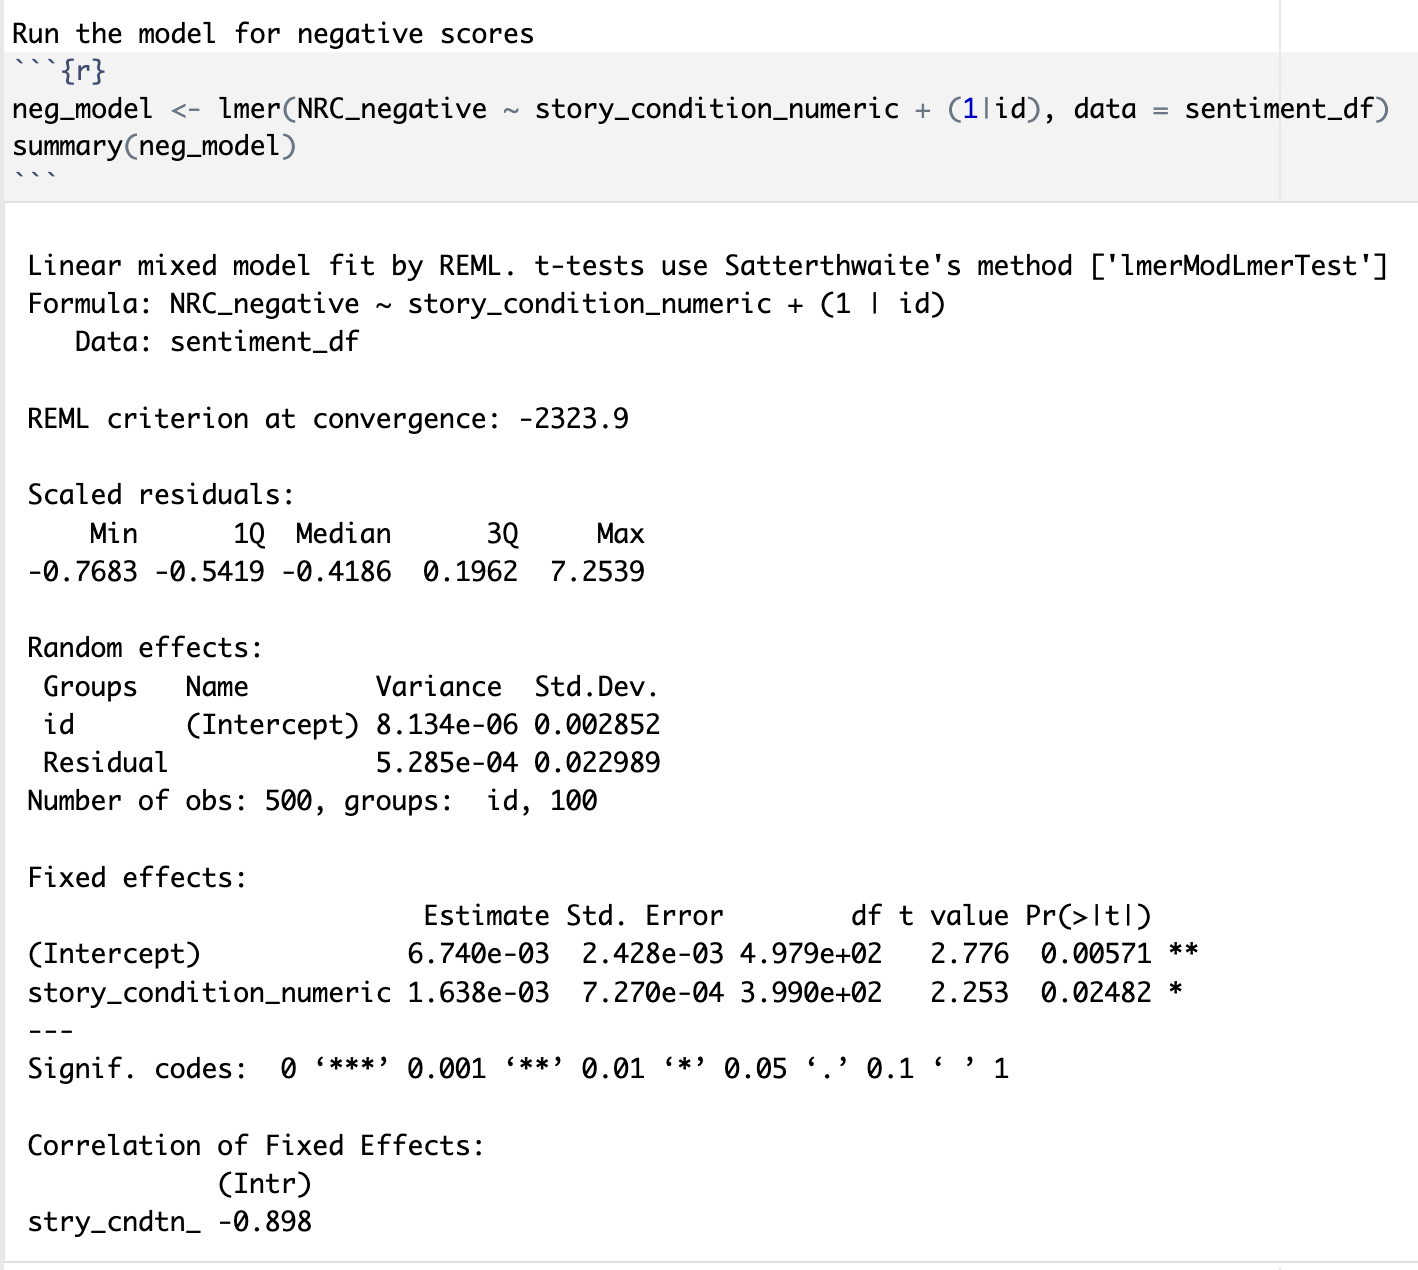

**Graph of Positive and Negative Sentiment over Story Conditions**

Finally, I created a graphic visualization of the data. This demonstrates the found effects above that as the level of disfluency in the passage increase, positive sentiment decreases and negative sentiment increases.

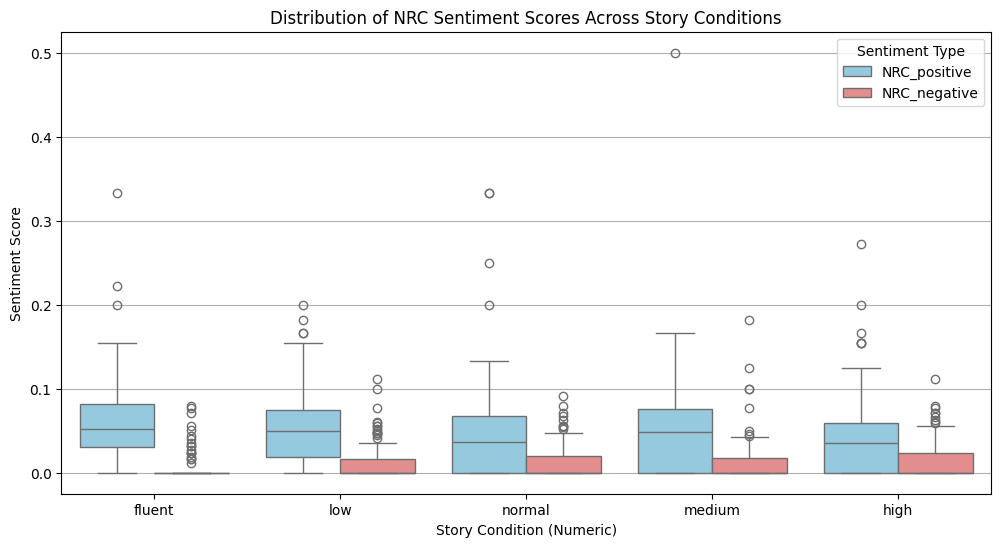

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))

# Melt the dataframe to have a single column for sentiment scores and a column for sentiment type
sentiment_melted = free_response_data.melt(id_vars=['story_condition_numeric'],
                                           value_vars=['NRC_positive', 'NRC_negative'],
                                           var_name='Sentiment_Type',
                                           value_name='Sentiment_Score')

# Create the boxplot with separate boxes for positive and negative sentiment
sns.boxplot(data=sentiment_melted, x='story_condition_numeric', y='Sentiment_Score', hue='Sentiment_Type', palette={'NRC_positive': 'skyblue', 'NRC_negative': 'lightcoral'})

plt.title('Distribution of NRC Sentiment Scores Across Story Conditions')
plt.xlabel('Story Condition (Numeric)')
plt.ylabel('Sentiment Score')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['fluent', 'low', 'normal', 'medium', 'high']) # Add 0 to ticks and an empty label
plt.legend(title='Sentiment Type', loc='upper right')
plt.grid(axis='y')
plt.show()

**1.4 Discussion**

The goal of this analysis was to investigate how listener's impressions towards a speaker changed as the level of disfluency in a passage increased. The present analysis aimed to extend previously shown effects that low levels of disfluency can influence listener judgments of confidence and competence (Brennan & Williams, 1995; Kirkland et al., 2023), by examining the level of filled pauses present in a passage along continuum. In line with our intial hypotheses that higher levels of disfluency would promote less positive and more negative sentiment, results from the mixed-effects models revealed a significant relationship between disfluency level and positive and negative sentiment toward the speaker. As disfluency level increases, positive sentiment decreases and negative semtiment increases.

While we see a significant effect here, the actual difference between conditions is relatively small. With an average of 30 words per response, and a median of 26, it is likely that the power reached in this analysis is also quite small. One way to increase text size and potentially reach higher power could be to ask participants to answer specific questions related to their thoughts about the speaker, as opposed to our single, open-ended, admittedly vauge ask, "Please tell us what you think about this speaker".

**1.5 References**

Benamara, F., Cesarano, C., Picariello, A., Reforgiato, D., & Subrahmanian, V. (2007). Sentiment Analysis: Adjectives and Adverbs are better than Adjectives Alone.

Bortfeld, H., Leon, S. D., Bloom, J. E., Schober, M. F., & Brennan, S. E. (2001). Disfluency Rates in Conversation: Effects of Age, Relationship, Topic, Role, and Gender. Language and Speech, 44(2), 123–147. https://doi.org/10.1177/00238309010440020101

Brennan, S. E., & Williams, M. (1995). The Feeling of Another′s Knowing: Prosody and Filled Pauses as Cues to Listeners about the Metacognitive States of Speakers. Journal of Memory and Language, 34(3), 383–398. https://doi.org/10.1006/jmla.1995.1017

Fox Tree, J. E. (1995). The Effects of False Starts and Repetitions on the Processing of Subsequent Words in Spontaneous Speech. Journal of Memory and Language, 34(6), 709–738. https://doi.org/10.1006/jmla.1995.1032

Hernandez, I., & Preston, J. L. (2013). Disfluency disrupts the confirmation bias. Journal of Experimental Social Psychology, 49(1), 178–182. https://doi.org/10.1016/j.jesp.2012.08.010

Kirkland, A., Gustafson, J., & Székely, É. (2023). Pardon my disfluency: The impact of disfluency effects on the perception of speaker competence and confidence. INTERSPEECH 2023, 5217–5221. https://doi.org/10.21437/interspeech.2023-887

Landwehr, J. R., & Eckmann, L. (2020). The nature of processing fluency: Amplification versus hedonic marking. Journal of Experimental Social Psychology, 90, 103997. https://doi.org/10.1016/j.jesp.2020.103997

Mohammad, S. M., & Turney, P. D. (2013). Crowdsourcing a Word-Emotion Association Lexicon. Computational Intelligence, 29(3), 436–465

Panico, J., Healey, E. C., Brouwer, K., & Susca, M. (2005). Listener perceptions of stuttering across two presentation modes: A quantitative and qualitative approachଝ. Journal of Fluency Disorders.

Perez, J., Newman, L. S., & Walmer, J. M. (2025). Acknowledging a Stutter Affects the Impression One Makes in a Job Interview. International Journal of Language & Communication Disorders, 60(3), e70035. https://doi.org/10.1111/1460-6984.70035

Trippas, D., Handley, S. J., & Verde, M. F. (2014). Fluency and belief bias in deductive reasoning: New indices for old effects. Frontiers in Psychology, 5. https://doi.org/10.3389/fpsyg.2014.00631

Ward, A., & Brenner, L. (2006). Accentuate the Negative: The Positive Effects of Negative Acknowledgment. Psychological Science, 17(11), 959–962. https://doi.org/10.1111/j.1467-9280.2006.01812.x

Zebrowski, P. M., Anderson, J. D., & Conture, E. G. (Eds.). (2022). Stuttering and Related Disorders of Fluency (4th ed., p. b000000273). Thieme Medical Publishers, Inc. https://doi.org/10.1055/b000000273

